### Load data and config

In [1]:
import pandas as pd
import duckdb

def load_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
    df = pd.concat(df_list)
    return df

def get_avg_execution_time(df):
    
    sql = """
        SELECT 
            ((max(CAST(qid AS INTEGER))+1)/3)::INTEGER as qid,
            spatial_resolution, 
            temporal_resolution,
            time_span, 
            area_persent, 
            category, 
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY spatial_resolution, temporal_resolution, time_span, area_persent, category
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()

    return df_avg

def load_results_row_swap(res_list):
    df_avg = load_results(res_list=res_list)
    # adding 3yr point for temporal resolution
    last_row = df_avg.iloc[-1:]
    df_final = df_avg.iloc[:-1]
    df_final = pd.concat([df_avg.iloc[:5], last_row, df_avg.iloc[5:-1]], ignore_index=True)
    
    return df_final

def load_find_time_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(qid)+1)/3)::integer as qid, 
            category, 
            time_span,
            filter_value,
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY category, time_span, filter_value
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()
    return df_avg


Import config

In [2]:
import json
json_file = "/home/uribe055/experiment-kit/experiment/results/config.json"
with open(json_file, "r") as f:
    cj = json.load(f)

### Read in data

In [3]:
# import glob

# systems_list = ["proposed", "vanilla", "cloud", "tiledb"]
# queries_list = ["raster", "heatmap", "findtime"]

# ls = []
# # read in all 
# for s in systems_list:
#     for q in queries_list:
#         cur_glob = glob.glob(cj[s][q])
#         cur_df = load_results(cur_glob)

In [13]:
import glob
polaris_list = glob.glob("/home/uribe055/experiment-kit/newGetRasExp0226/proposed_GR_result_*.csv")
df_polaris_all = load_results(polaris_list)

vanilla_list = glob.glob("/home/uribe055/experiment-kit/newGetRasExp0226/vanilla_GR_result_*-*.csv")
df_vanilla_all = load_results(vanilla_list)

tdb_list = glob.glob("/home/uribe055/experiment-kit/newGetRasExp0226/tdb_GR_result_*-*.csv")
df_tdb_all = load_results(tdb_list)

In [14]:
category = "changing_area"

df_polaris = df_polaris_all[df_polaris_all["category"]==category]
df_vanilla = df_vanilla_all[df_vanilla_all["category"]==category]
df_tdb = df_tdb_all[df_tdb_all["category"]==category]

### New Plots Function

Text(0.5, 0, 'Spatial region (% of Alaska)')

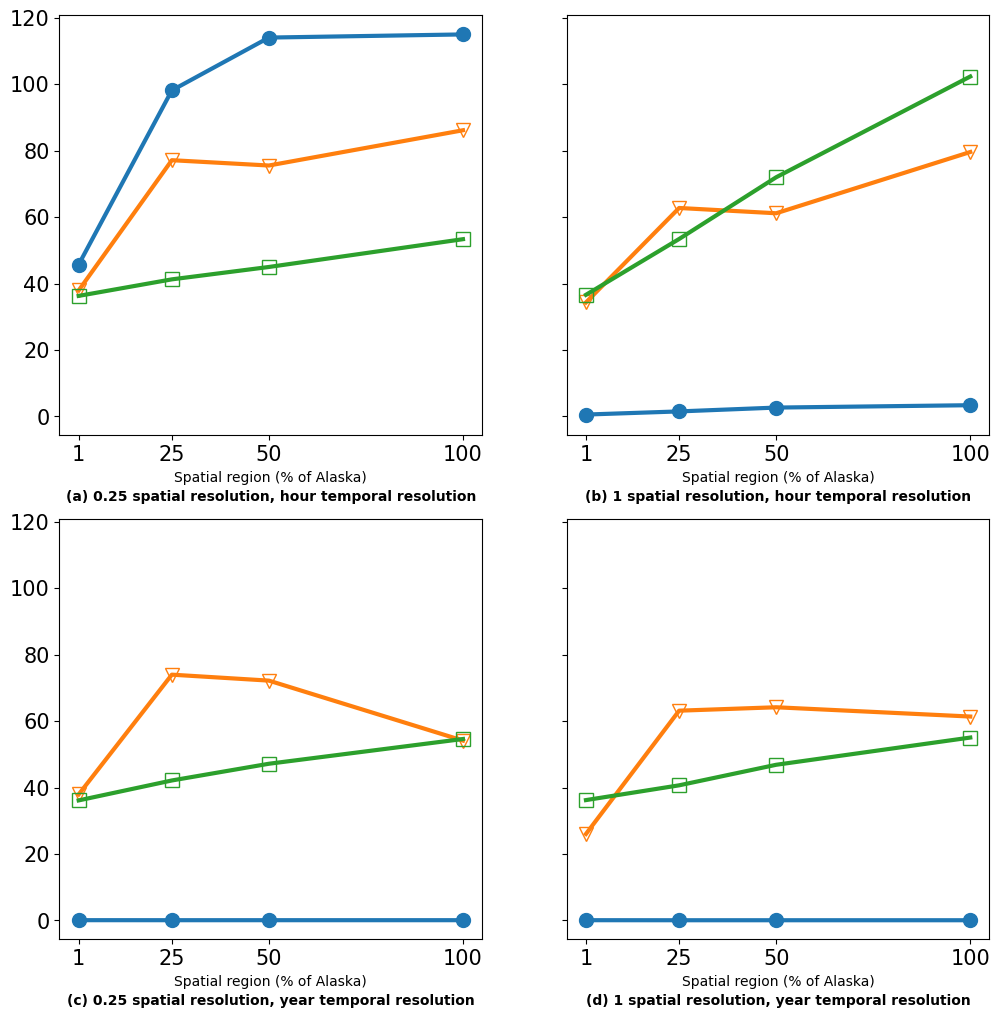

In [15]:
import matplotlib.pyplot as plt

m_size = 10
ticklist = [1, 25, 50, 100]
ticklabels = [1, 25, 50, 100]
ticksize = 15
line_width = 3
subplotyspacing= -0.15
subtitlesfontsize = 10
below = "top"

# plot Figure 5 abcd: changing spatial area
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

# fig a: changing spatial area, 5 years, 0.25 spatial resolution, hour temporal resolution
df_polaris_ = df_polaris[
    (df_polaris["time_span"] == 5)
    & (df_polaris["temporal_resolution"] == "hour")
    & (df_polaris["spatial_resolution"] == 0.25)
].sort_values("area_persent")
df_polaris_a = get_avg_execution_time(df_polaris_)

df_vanilla_ = df_vanilla[
    (df_vanilla["time_span"] == 5)
    & (df_vanilla["temporal_resolution"] == "hour")
    & (df_vanilla["spatial_resolution"] == 0.25)
].sort_values("area_persent")
df_vanilla_a = get_avg_execution_time(df_vanilla_)

df_tdb_ = df_tdb[
    (df_tdb["time_span"] == 5) 
    & (df_tdb["temporal_resolution"] == "hour") 
    & (df_tdb["spatial_resolution"] == 0.25)
].sort_values("area_persent")
df_tdb_a = get_avg_execution_time(df_tdb_)

axs[0, 0].plot(
    df_polaris_a["area_persent"], df_polaris_a["avg_execution_time"], label="Polaris", marker="o", ms=m_size, fillstyle="full", linestyle="-", linewidth=line_width)

axs[0, 0].plot(
    df_vanilla_a["area_persent"], df_vanilla_a["avg_execution_time"], label="Vanilla", marker="v", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)

axs[0, 0].plot(
    df_tdb_a["area_persent"], df_tdb_a["avg_execution_time"], label="TDB", marker="s", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)

axs[0, 0].set_title("(a) 0.25 spatial resolution, hour temporal resolution",  fontsize=subtitlesfontsize, fontweight='bold', y=subplotyspacing, va=below)
axs[0, 0].tick_params(axis="both", labelsize=ticksize)
if ticklist is not None:
    axs[0, 0].set_xticks(ticks=ticklist, labels=ticklabels)
axs[0, 0].set_xlabel("Spatial region (% of Alaska)")

# fig b: changing spatial area, 5 years, 1 spatial resolution, hour temporal resolution
df_polaris_ = df_polaris[
    (df_polaris["time_span"] == 5)
    & (df_polaris["temporal_resolution"] == "hour")
    & (df_polaris["spatial_resolution"] == 1)
].sort_values("area_persent")
df_polaris_b = get_avg_execution_time(df_polaris_)

df_vanilla_ = df_vanilla[
    (df_vanilla["time_span"] == 5)
    & (df_vanilla["temporal_resolution"] == "hour")
    & (df_vanilla["spatial_resolution"] == 1)
].sort_values("area_persent")
df_vanilla_b = get_avg_execution_time(df_vanilla_)


df_tdb_ = df_tdb[
    (df_tdb["time_span"] == 5) 
    & (df_tdb["temporal_resolution"] == "hour") 
    & (df_tdb["spatial_resolution"] == 1)
].sort_values("area_persent")
df_tdb_b = get_avg_execution_time(df_tdb_)


axs[0, 1].plot(df_polaris_b["area_persent"], df_polaris_b["avg_execution_time"], label="Polaris", marker="o", ms=m_size, fillstyle="full", linestyle="-", linewidth=line_width)
axs[0, 1].plot(df_vanilla_b["area_persent"], df_vanilla_b["avg_execution_time"], label="Vanilla", marker="v", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)
axs[0, 1].plot(df_tdb_b["area_persent"], df_tdb_b["avg_execution_time"], label="TDB", marker="s", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)

axs[0, 1].set_title("(b) 1 spatial resolution, hour temporal resolution", fontsize=subtitlesfontsize, fontweight='bold', y=subplotyspacing, va=below)
axs[0, 1].tick_params(axis="both", labelsize=ticksize)
if ticklist is not None:
    axs[0, 1].set_xticks(ticks=ticklist, labels=ticklabels)
axs[0, 1].set_xlabel("Spatial region (% of Alaska)")

# fig c: changing spatial area, 5 years, 0.25 spatial resolution, year temporal resolution
df_polaris_ = df_polaris[
    (df_polaris["time_span"] == 5)
    & (df_polaris["temporal_resolution"] == "year")
    & (df_polaris["spatial_resolution"] == 0.25)
].sort_values("area_persent")
df_polaris_c = get_avg_execution_time(df_polaris_)

df_vanilla_ = df_vanilla[
    (df_vanilla["time_span"] == 5)
    & (df_vanilla["temporal_resolution"] == "year")
    & (df_vanilla["spatial_resolution"] == 0.25)
].sort_values("area_persent")
df_vanilla_c = get_avg_execution_time(df_vanilla_)

df_tdb_ = df_tdb[
    (df_tdb["time_span"] == 5) 
    & (df_tdb["temporal_resolution"] == "year") 
    & (df_tdb["spatial_resolution"] == 0.25)
].sort_values("area_persent")
df_tdb_c = get_avg_execution_time(df_tdb_)

axs[1, 0].plot(df_polaris_c["area_persent"], df_polaris_c["avg_execution_time"], label="Polaris", marker="o", ms=m_size, fillstyle="full", linestyle="-", linewidth=line_width)
axs[1, 0].plot(df_vanilla_c["area_persent"], df_vanilla_c["avg_execution_time"], label="Vanilla",  marker="v", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)
axs[1, 0].plot(df_tdb_c["area_persent"], df_tdb_c["avg_execution_time"], label="TDB", marker="s", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)

axs[1, 0].set_title("(c) 0.25 spatial resolution, year temporal resolution", fontsize=subtitlesfontsize, fontweight='bold', y=subplotyspacing, va=below)
axs[1, 0].tick_params(axis="both", labelsize=ticksize)
if ticklist is not None:
    axs[1, 0].set_xticks(ticks=ticklist, labels=ticklabels)
axs[1, 0].set_xlabel("Spatial region (% of Alaska)")

# fig d: changing spatial area, 5 years, 1 spatial resolution, year temporal resolution
df_polaris_ = df_polaris[
    (df_polaris["time_span"] == 5)
    & (df_polaris["temporal_resolution"] == "year")
    & (df_polaris["spatial_resolution"] == 1)
].sort_values("area_persent")
df_polaris_d = get_avg_execution_time(df_polaris_)

df_vanilla_ = df_vanilla[
    (df_vanilla["time_span"] == 5)
    & (df_vanilla["temporal_resolution"] == "year")
    & (df_vanilla["spatial_resolution"] == 1)
].sort_values("area_persent")
df_vanilla_d = get_avg_execution_time(df_vanilla_)

df_tdb_ = df_tdb[
    (df_tdb["time_span"] == 5) 
    & (df_tdb["temporal_resolution"] == "year") 
    & (df_tdb["spatial_resolution"] == 1)
].sort_values("area_persent")
df_tdb_d = get_avg_execution_time(df_tdb_)

axs[1, 1].plot(df_polaris_d["area_persent"], df_polaris_d["avg_execution_time"], label="Polaris", marker="o", ms=m_size, fillstyle="full", linestyle="-", linewidth=line_width)
axs[1, 1].plot(df_vanilla_d["area_persent"], df_vanilla_d["avg_execution_time"], label="Vanilla", marker="v", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)
axs[1, 1].plot(df_tdb_d["area_persent"], df_tdb_d["avg_execution_time"], label="TDB", marker="s", ms=m_size, fillstyle="none", linestyle="-", linewidth=line_width)

axs[1, 1].set_title("(d) 1 spatial resolution, year temporal resolution", fontsize=subtitlesfontsize, fontweight='bold', y=subplotyspacing, va=below)
axs[1, 1].tick_params(axis="both", labelsize=ticksize)
if ticklist is not None:
    axs[1, 1].set_xticks(ticks=ticklist, labels=ticklabels)
axs[1, 1].set_xlabel("Spatial region (% of Alaska)")

### Original Custom Plots Function

In [ ]:
import matplotlib.pyplot as plt

def custom_plot(df1, df2, df3, df4, 
                df3bool, df4bool, 
                nrows, ncols, 
                rowsize, colsize, 
                labsx, labsy, linearbool, ticksize, ticklist, ticklabels,
                subtitles, subtitlesfontsize, subplotyspacing,
                figtitle, figtitlefontsize, 
                categories, barlegendbool, 
                markernames, markersize, markerfills, 
                systemnames, linestyles, linewidth, 
                padding, anchor):
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(colsize, rowsize), sharey=True)
    
    if nrows + ncols > 2:
        axs = axs.flatten()

        for i, (category, x_lab) in enumerate(zip(categories, labsx)):
            df1_cat = df1[df1["category"] == category]  # proposed
            df2_cat = df2[df2["category"] == category]  # vanilla

            df_list = [df1_cat, df2_cat]

            if df3bool: #cloud
                df3_cat = df3[df3["category"] == category]
                df_list.append(df3_cat)
            if df4bool: # tiledb
                df4_cat = df4[df4["category"] == category]
                df_list.append(df4_cat)

            x_col = cj["general"]["x_col"][category]

            if not linearbool:
                axs[i].set_yscale("log", base=10)

            customizations = zip(df_list, systemnames, markernames, markerfills, linestyles)
            
            for df, s_name, m_name, m_fill, l_style, in customizations:

                # plot each system's line
                axs[i].plot(df[x_col], df["avg_execution_time"], label=s_name, 
                                marker=m_name, ms=markersize, fillstyle=m_fill, linestyle=l_style)
            
            # set subplot axis params
            axs[i].tick_params(axis="both", labelsize=ticksize)

            if ticklist is not None:
                axs[i].set_xticks(ticks=ticklist[i], labels=ticklabels[i])
            axs[i].set_title(subtitles[i], fontsize=subtitlesfontsize, fontweight='bold', y=subplotyspacing, va=cj["genera"]["below"])
            axs[i].set_xlabel(x_lab, )